# Détection de segments dans une image

C'est une technique assez vieille et qui consiste à détecter des segments comme des anomalies : l'alignement de points est un événement assez rare dans un nuage de points mais rare comment ? Cette idée mène à la probabilisation d'une image pour quantifier ce qu'est un alignement de points nécessairement rare.

## Une image aléatoire

On considère un bruit aléatoire uniforme dans une image et on ajoute des points aléatoires tirés le long d'une ligne selon une loi gaussienne : uniforme sur la ligne, gaussien autour du segment.

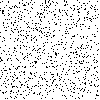

In [2]:
from mlstatpy.image.detection_segment import random_noise_image, convert_array2PIL

img = random_noise_image((100, 100))
convert_array2PIL(img, mode="binary")

In [3]:
from mlstatpy.image.detection_segment import random_segment_image

random_segment_image(img, density=3.0, lmin=0.3)

{'size': 36,
 'angle': 2.285619160431492,
 'x1': 23.597410654261072,
 'y1': 40,
 'x2': 0,
 'y2': 67.18753777770554,
 'nbpoints': 108}

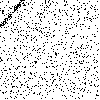

In [4]:
convert_array2PIL(img, mode="binary")

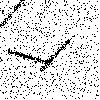

In [5]:
random_segment_image(img, density=5.0, lmin=0.3)
random_segment_image(img, density=5.0, lmin=0.3)
convert_array2PIL(img, mode="binary")

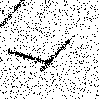

In [6]:
pilimg = convert_array2PIL(img, mode="binary").convert("RGB")
pilimg

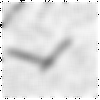

In [7]:
from PIL import ImageFilter


pilimg = (
    pilimg.filter(ImageFilter.BLUR)
    .filter(ImageFilter.BLUR)
    .filter(ImageFilter.BLUR)
    .filter(ImageFilter.BLUR)
)
pilimg

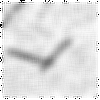

In [8]:
from PIL import ImageEnhance

enh = ImageEnhance.Sharpness(pilimg)
final_img = enh.enhance(4)
final_img

## Gradient

La détection des segments est basée sur le gradient.

In [9]:
from mlstatpy.image.detection_segment import compute_gradient, plot_gradient

grad = compute_gradient(final_img, color=0)

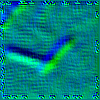

In [10]:
plot_gradient(pilimg.copy(), grad, direction=-2)

## Détection de segments

In [11]:
from mlstatpy.image.detection_segment import detect_segments

seg = detect_segments(final_img, verbose=1, seuil_nfa=1e-1)
len(seg)

n =  1000  ...  82  temps  0.27  sec nalign 298
n =  2000  ...  82  temps  0.52  sec nalign 671
n =  3000  ...  164  temps  0.83  sec nalign 964
n =  4000  ...  164  temps  1.10  sec nalign 1357
n =  5000  ...  249  temps  1.39  sec nalign 1544
n =  6000  ...  252  temps  1.66  sec nalign 1924
n =  7000  ...  374  temps  1.95  sec nalign 2183
n =  8000  ...  375  temps  2.23  sec nalign 2460
n =  9000  ...  379  temps  2.56  sec nalign 2728


379

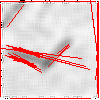

In [12]:
from mlstatpy.image.detection_segment import plot_segments

plot_segments(final_img.copy(), seg)

## Détection de segments sur une image

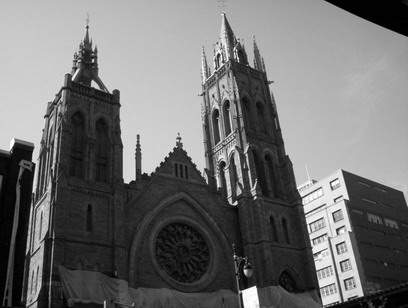

In [13]:
from PIL import Image

egl = Image.open("eglise_zoom2.jpg")
egl

On réduit la taille de l'image.

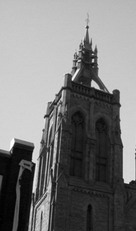

In [14]:
egl2 = egl.crop((0, 0, egl.size[0] // 3, 3 * egl.size[1] // 4))
egl2

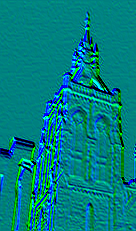

In [15]:
grad2 = compute_gradient(egl2, color=0)
plot_gradient(egl2.copy(), grad2, direction=-2)

In [16]:
seg2 = detect_segments(egl2)
len(seg2)

490

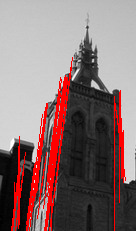

In [17]:
from mlstatpy.image.detection_segment import plot_segments

res = plot_segments(egl2.copy(), seg2)
res

Il faudrait fusionner les segments mais cela a l'air de marcher.